In [1]:
from evaluation import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from transformers import GPT2TokenizerFast, BertTokenizer, BertModel
import umap
from sklearn.cluster import KMeans

/home/fe/hufe/miniconda3/envs/remote-sensing/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package wordnet to /home/fe/hufe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/fe/hufe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
%cd ..

/home/fe/hufe/Documents/semester11/activelearning_ic


In [6]:
data = pd.DataFrame({
    'classes': open('evaluation/test_classes.txt').read().splitlines(),
    'text': open('evaluation/full_model_on_testset.txt').read().splitlines()
})

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert = BertModel.from_pretrained("bert-base-uncased").to(device)

In [80]:
with torch.no_grad():
    tokens = bert_tokenizer(list(data.text.values), padding="longest").input_ids
    tokens = torch.tensor(tokens).to(device)
    embeddings = []
    for i in tqdm(range(len(tokens))):
        emb = bert(tokens[i].view(1,38)).pooler_output.cpu().detach()
        embeddings.append(emb)

100%|██████████| 3150/3150 [00:39<00:00, 79.19it/s]


In [81]:
embeddings = list(map(lambda x: x[0].numpy(), embeddings))

In [105]:
reducer = umap.UMAP()
low_dim_embedding = reducer.fit_transform(np.stack(embeddings, axis=0))

In [83]:
low_dim_embedding

array([[ 9.753099 ,  2.8654568],
       [10.298313 ,  4.6937094],
       [13.149231 ,  2.4681683],
       ...,
       [16.740688 ,  3.8755608],
       [16.747238 ,  3.780533 ],
       [13.851469 ,  6.486157 ]], dtype=float32)

<AxesSubplot: >

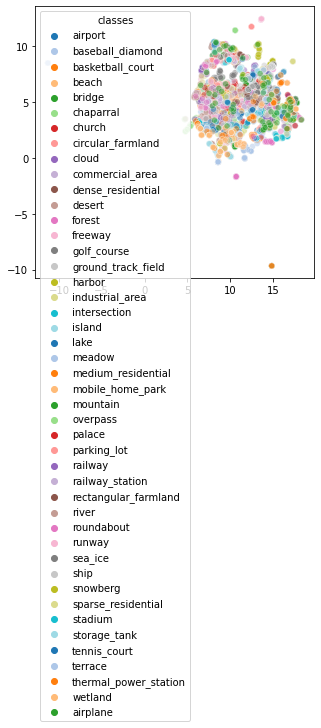

In [104]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=low_dim_embedding[:,0], y=low_dim_embedding[:,1], hue=data.classes, palette='tab20', alpha=0.5)